<a href="https://colab.research.google.com/github/KohsukeIde/numerical-calc/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95_%E8%AA%B2%E9%A1%8C9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 問題設定と厳密解の確認
微分方程式: dy/dx = y / (2(x + 1))
初期条件: y(0) = y0 (ここでは y0 = 1)
区間: x ∈ [0, 10]
ステップ幅: h = 1

厳密解の確認:
厳密解は y = y0 * sqrt(x + 1) である。
確認手順:
1. y = y0 * sqrt(x + 1) を微分: dy/dx = y0 / (2 * sqrt(x + 1))
2. 微分方程式の右辺: y / (2(x + 1)) = (y0 * sqrt(x + 1)) / (2(x + 1)) = y0 / (2 * sqrt(x + 1))
3. 左辺と右辺が一致することを確認
4. 初期条件 y(0) = y0 * sqrt(0 + 1) = y0 も満たすことを確認
よって、y = y0 * sqrt(x + 1) が正しい厳密解。

2. 厳密解
x		y(exact)
0.0		1.000000
1.0		1.414214
2.0		1.732051
3.0		2.000000
4.0		2.236068
5.0		2.449490
6.0		2.645751
7.0		2.828427
8.0		3.000000
9.0		3.162278
10.0		3.316625

3. Euler法
x		y(Euler)	Error
0.0		1.000000	0.000000
1.0		1.500000	0.085786
2.0		1.875000	0.142949
3.0		2.187500	0.187500
4.0		2.460938	0.224870
5.0		2.707031	0.257542
6.0		2.932617	0.286866
7.0		3.142090	0.313663
8.0		3.338470	0.338470
9.0		3.523941	0.361663
10.0		3.700138	0.383513

4. Heun法
x		y(Heun)		Error
0.0		1.000000	0.000000
1.0		1.437500	0.023286
2.0		1.766927	0.034876
3.0		2.043009	0.043009
4.0		2.285617	0.049549
5.

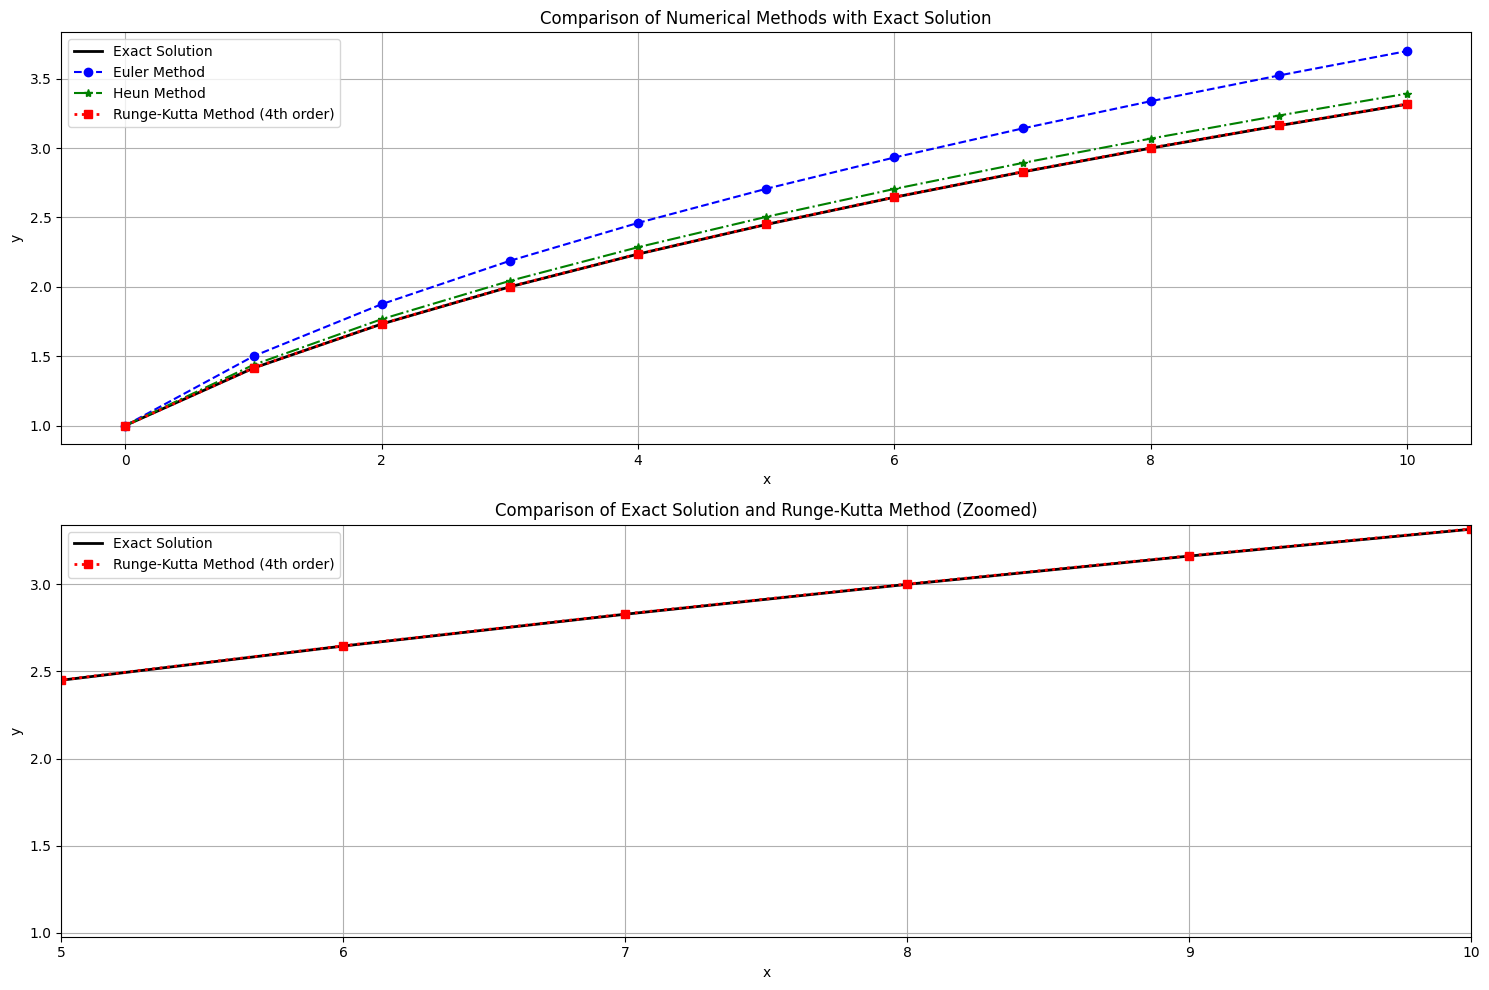


7. 結果の考察
1. 精度比較:
   - Euler法が最も誤差が大きく、厳密解から最も離れている。
   - Heun法はEuler法より精度が改善されていますが、まだ誤差が見られる。
   - 4次のRunge-Kutta法が最も精度が高く、厳密解に最も近い結果を示している。

2. 計算量:
   - Euler法が最も計算量が少なく、1ステップあたり1回の関数評価で済む。
   - Heun法は1ステップあたり2回の関数評価が必要。
   - 4次のRunge-Kutta法は1ステップあたり4回の関数評価が必要で、最も計算量が多い。

3. 使用場面:
   - 高精度が要求される場合は4次のRunge-Kutta法が適している。
   - 計算速度が重要な場合は、要求される精度に応じてEuler法やHeun法を選択することもあると考える。

4. ステップ幅の影響:
   - このシミュレーションではステップ幅h=1を使用しましたが、これを小さくすることで
     すべての方法の精度が向上すると考えられる。特にEuler法とHeun法で顕著な改善が見込まれる。


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 問題設定と厳密解の確認
print("1. 問題設定と厳密解の確認")
print("微分方程式: dy/dx = y / (2(x + 1))")
print("初期条件: y(0) = y0 (ここでは y0 = 1)")
print("区間: x ∈ [0, 10]")
print("ステップ幅: h = 1")
print("\n厳密解の確認:")
print("厳密解は y = y0 * sqrt(x + 1) である。")
print("確認手順:")
print("1. y = y0 * sqrt(x + 1) を微分: dy/dx = y0 / (2 * sqrt(x + 1))")
print("2. 微分方程式の右辺: y / (2(x + 1)) = (y0 * sqrt(x + 1)) / (2(x + 1)) = y0 / (2 * sqrt(x + 1))")
print("3. 左辺と右辺が一致することを確認")
print("4. 初期条件 y(0) = y0 * sqrt(0 + 1) = y0 も満たすことを確認")
print("よって、y = y0 * sqrt(x + 1) が正しい厳密解。")

# 関数定義
def exact_solution(x, y0):
    return y0 * np.sqrt(x + 1)

def f(x, y):
    return y / (2 * (x + 1))

# 初期値と計算パラメータ
x0, y0 = 0, 1
h = 1
n = 10
x_values = np.linspace(x0, x0 + n * h, n + 1)

# 2. 厳密解の計算
print("\n2. 厳密解")
y_exact = exact_solution(x_values, y0)

print("x\t\ty(exact)")
for x, y in zip(x_values, y_exact):
    print(f"{x:.1f}\t\t{y:.6f}")

# 3. Euler法による数値解
print("\n3. Euler法")
y_euler = np.zeros(n + 1)
y_euler[0] = y0

for i in range(n):
    y_euler[i + 1] = y_euler[i] + h * f(x_values[i], y_euler[i])

print("x\t\ty(Euler)\tError")
for x, y in zip(x_values, y_euler):
    error = abs(exact_solution(x, y0) - y)
    print(f"{x:.1f}\t\t{y:.6f}\t{error:.6f}")

# 4. Heun法による数値解
print("\n4. Heun法")
y_heun = np.zeros(n + 1)
y_heun[0] = y0

for i in range(n):
    y_predictor = y_heun[i] + h * f(x_values[i], y_heun[i])
    y_heun[i + 1] = y_heun[i] + (h / 2) * (f(x_values[i], y_heun[i]) + f(x_values[i + 1], y_predictor))

print("x\t\ty(Heun)\t\tError")
for x, y in zip(x_values, y_heun):
    error = abs(exact_solution(x, y0) - y)
    print(f"{x:.1f}\t\t{y:.6f}\t{error:.6f}")

# 5. 4次のRunge-Kutta法による数値解
print("\n5. 4次のRunge-Kutta法")
y_rk4 = np.zeros(n + 1)
y_rk4[0] = y0

for i in range(n):
    k1 = h * f(x_values[i], y_rk4[i])
    k2 = h * f(x_values[i] + h / 2, y_rk4[i] + k1 / 2)
    k3 = h * f(x_values[i] + h / 2, y_rk4[i] + k2 / 2)
    k4 = h * f(x_values[i] + h, y_rk4[i] + k3)
    y_rk4[i + 1] = y_rk4[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

print("x\t\ty(RK4)\t\tError")
for x, y in zip(x_values, y_rk4):
    error = abs(exact_solution(x, y0) - y)
    print(f"{x:.1f}\t\t{y:.6f}\t{error:.6f}")


plt.figure(figsize=(15, 10))

# 全体図
plt.subplot(2, 1, 1)
plt.plot(x_values, y_exact, 'k-', linewidth=2, label='Exact Solution')
plt.plot(x_values, y_euler, 'bo--', label='Euler Method')
plt.plot(x_values, y_heun, 'g*-.', label='Heun Method')
plt.plot(x_values, y_rk4, 'rs:', linewidth=2, label='Runge-Kutta Method (4th order)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Numerical Methods with Exact Solution')
plt.grid(True)

# 拡大図
plt.subplot(2, 1, 2)
plt.plot(x_values, y_exact, 'k-', linewidth=2, label='Exact Solution')
plt.plot(x_values, y_rk4, 'rs:', linewidth=2, label='Runge-Kutta Method (4th order)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Exact Solution and Runge-Kutta Method (Zoomed)')
plt.grid(True)

# y軸の範囲を調整して差を強調
y_min = min(min(y_exact), min(y_rk4))
y_max = max(max(y_exact), max(y_rk4))
y_range = y_max - y_min
plt.ylim(y_min - 0.01 * y_range, y_max + 0.01 * y_range)

# x軸の範囲を調整（例：後半部分にフォーカス）
plt.xlim(5, 10)

plt.tight_layout()
plt.show()

# 7. 結果の考察
print("\n7. 結果の考察")
print("1. 精度比較:")
print("   - Euler法が最も誤差が大きく、厳密解から最も離れている。")
print("   - Heun法はEuler法より精度が改善されていますが、まだ誤差が見られる。")
print("   - 4次のRunge-Kutta法が最も精度が高く、厳密解に最も近い結果を示している。")
print("\n2. 計算量:")
print("   - Euler法が最も計算量が少なく、1ステップあたり1回の関数評価で済む。")
print("   - Heun法は1ステップあたり2回の関数評価が必要。")
print("   - 4次のRunge-Kutta法は1ステップあたり4回の関数評価が必要で、最も計算量が多い。")
print("\n3. 使用場面:")
print("   - 高精度が要求される場合は4次のRunge-Kutta法が適している。")
print("   - 計算速度が重要な場合は、要求される精度に応じてEuler法やHeun法を選択することもあると考える。")
print("\n4. ステップ幅の影響:")
print("   - このシミュレーションではステップ幅h=1を使用しましたが、これを小さくすることで")
print("     すべての方法の精度が向上すると考えられる。特にEuler法とHeun法で顕著な改善が見込まれる。")